# Derin Öğrenme Nedir?

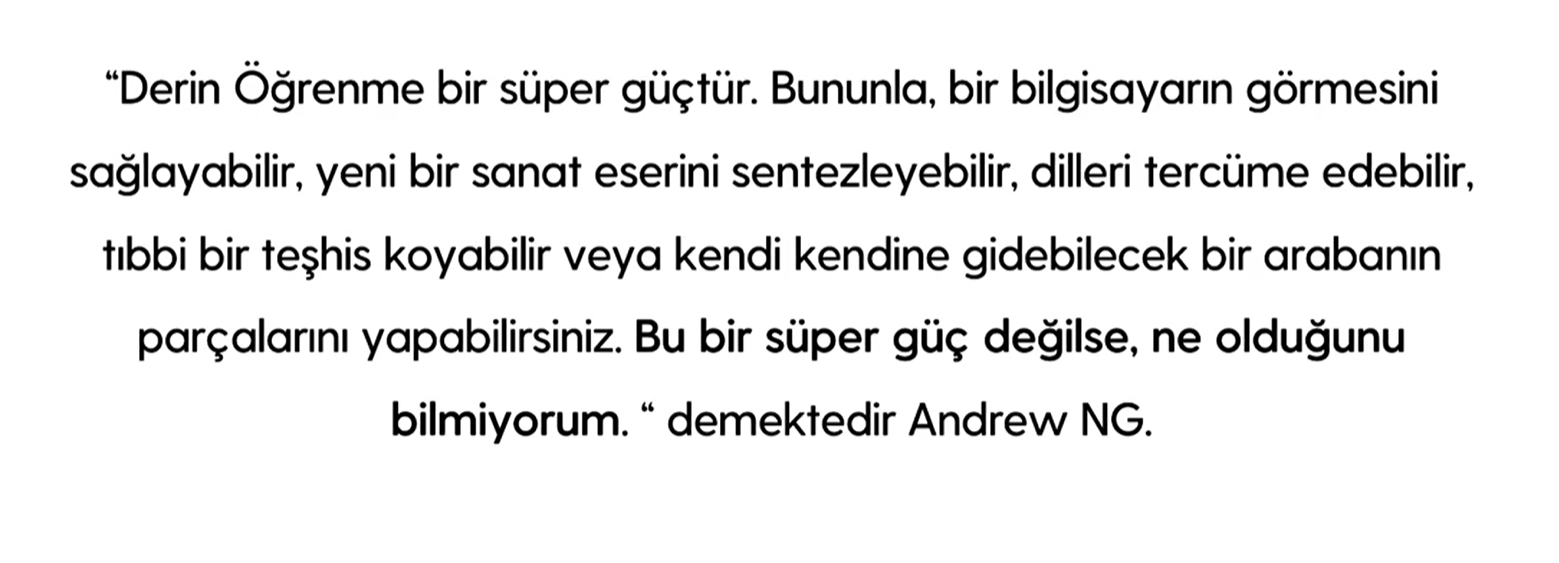

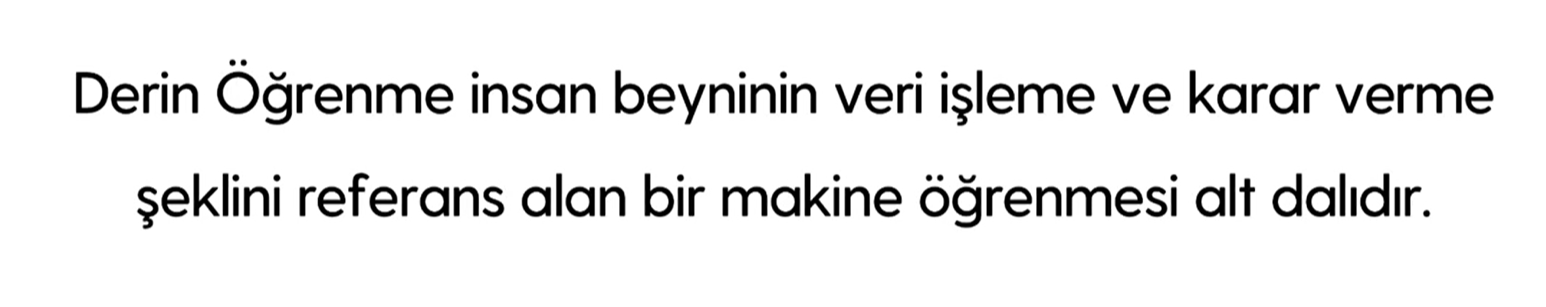

# Yapay Sinir Ağları

### Yapay Sinir Hücresi

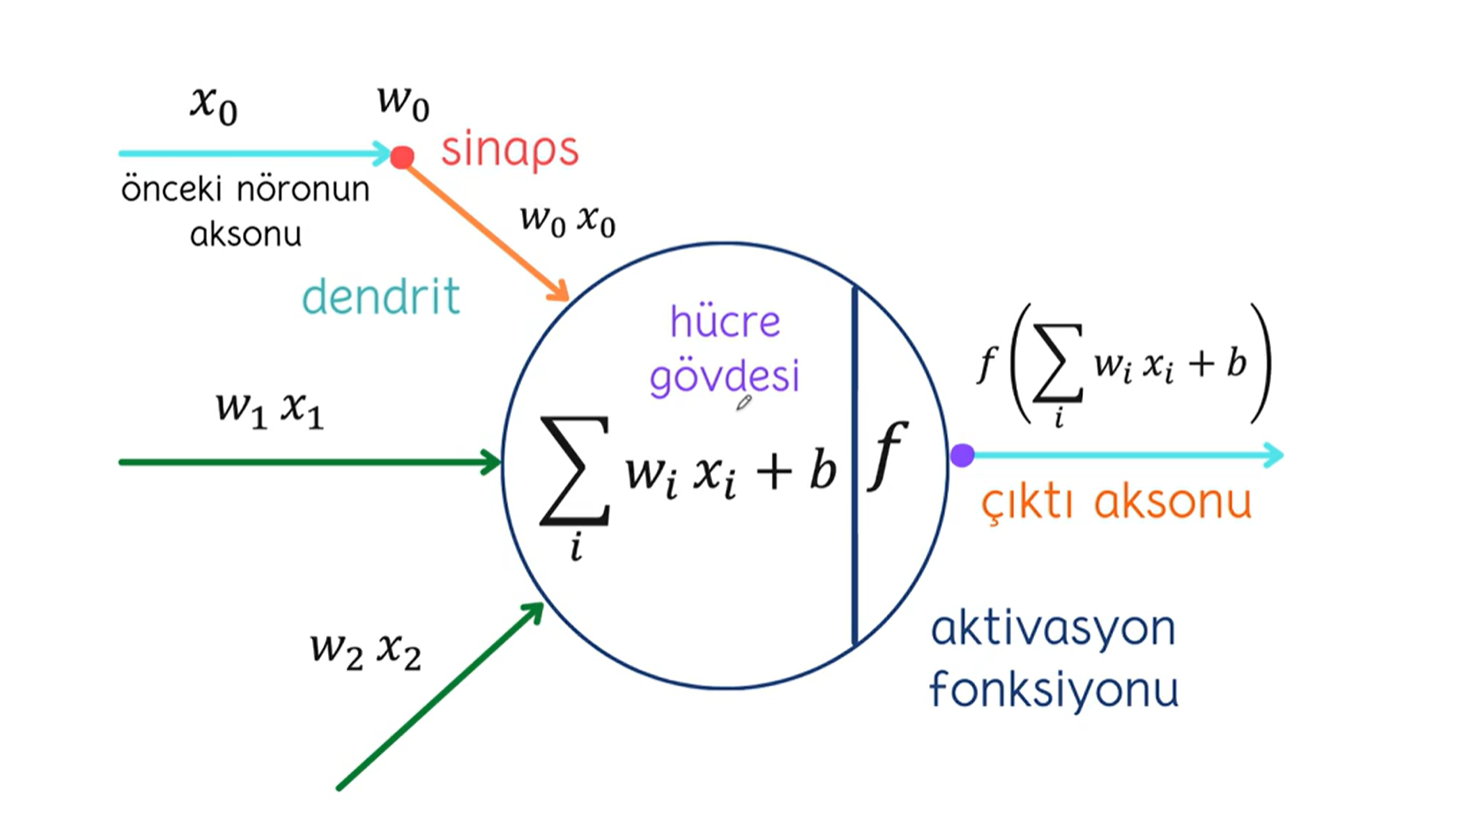

### Yapay Sinir Ağı

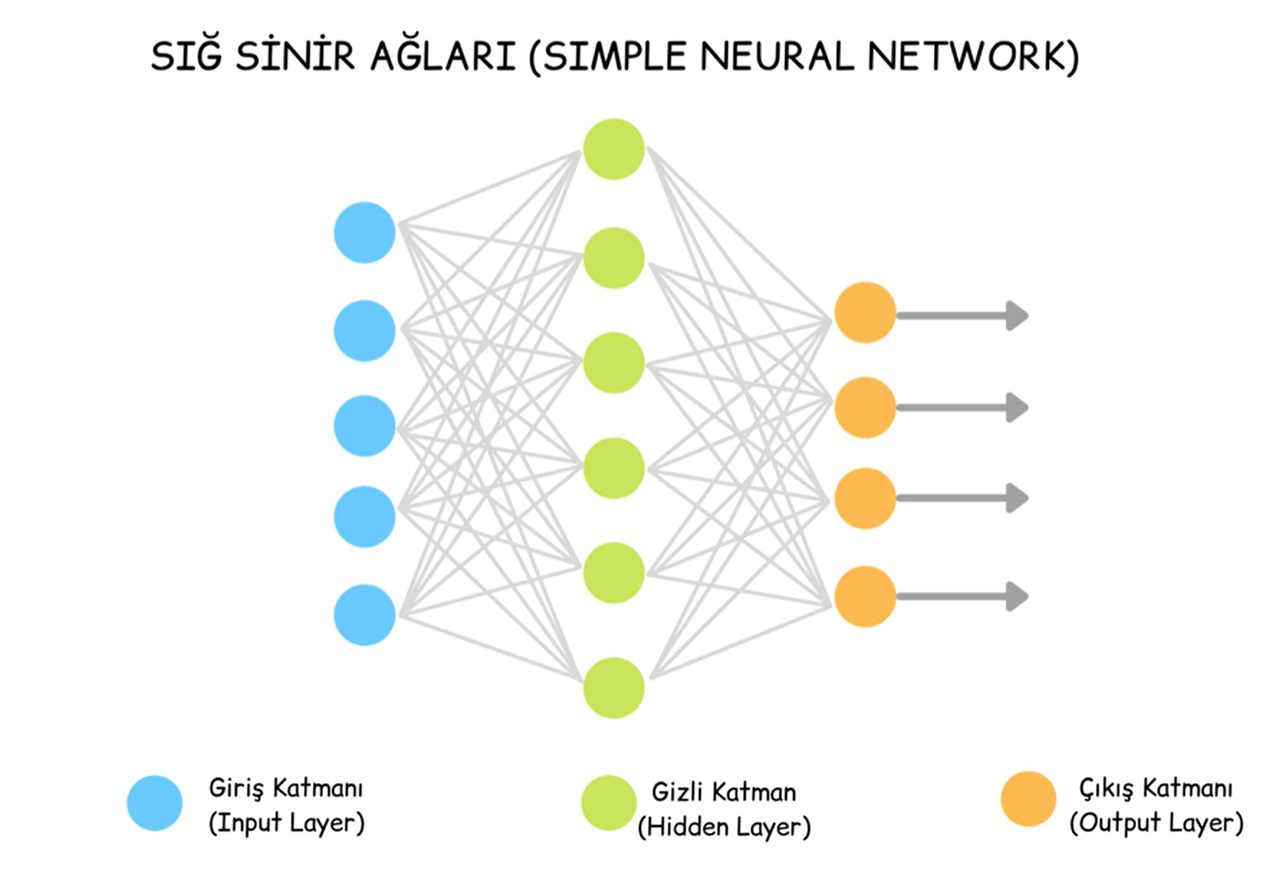

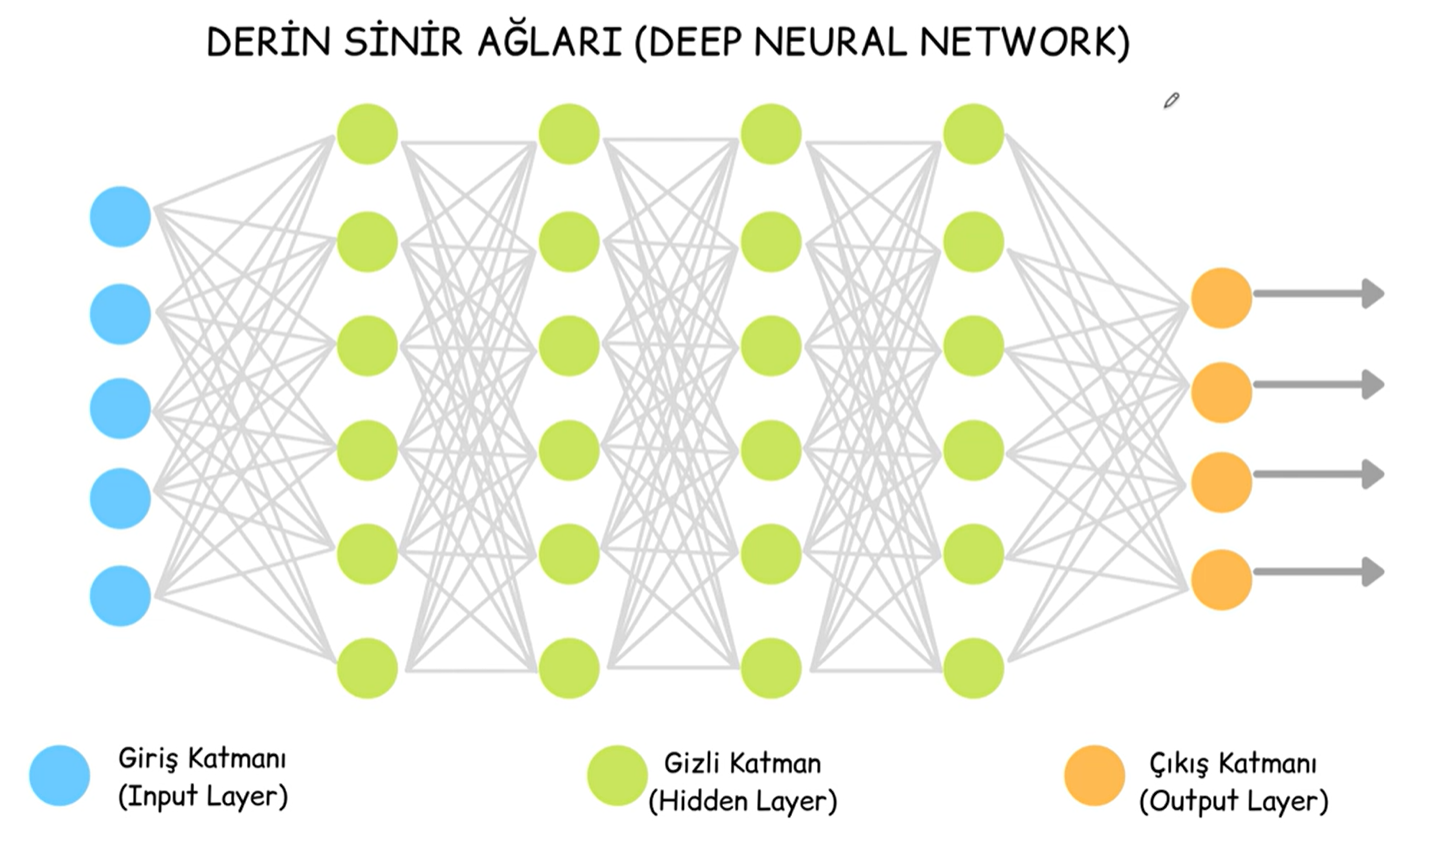

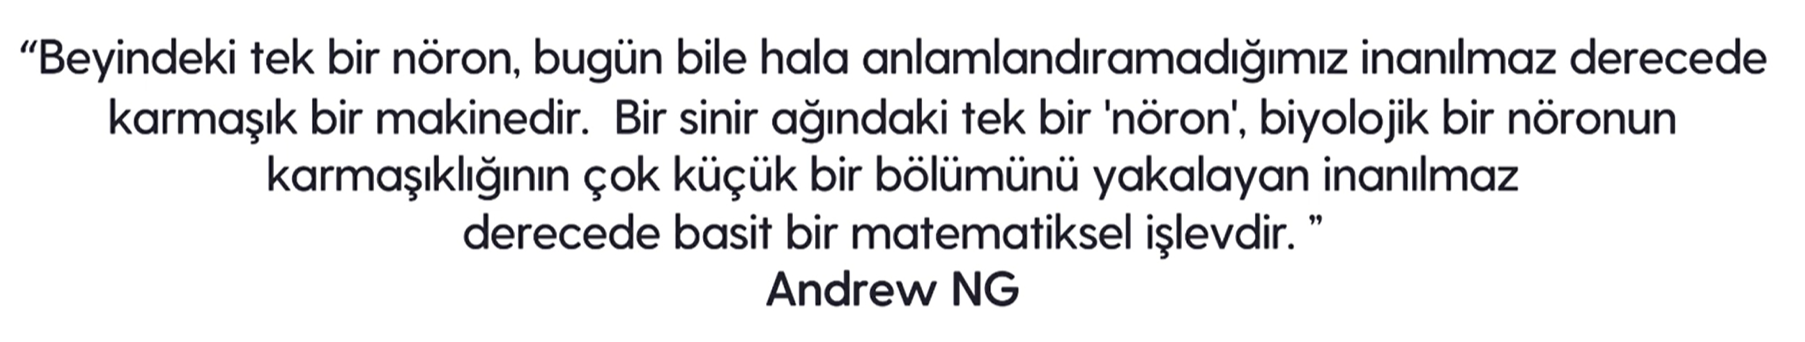

### Gradient Descent(Gradyan İnişi)

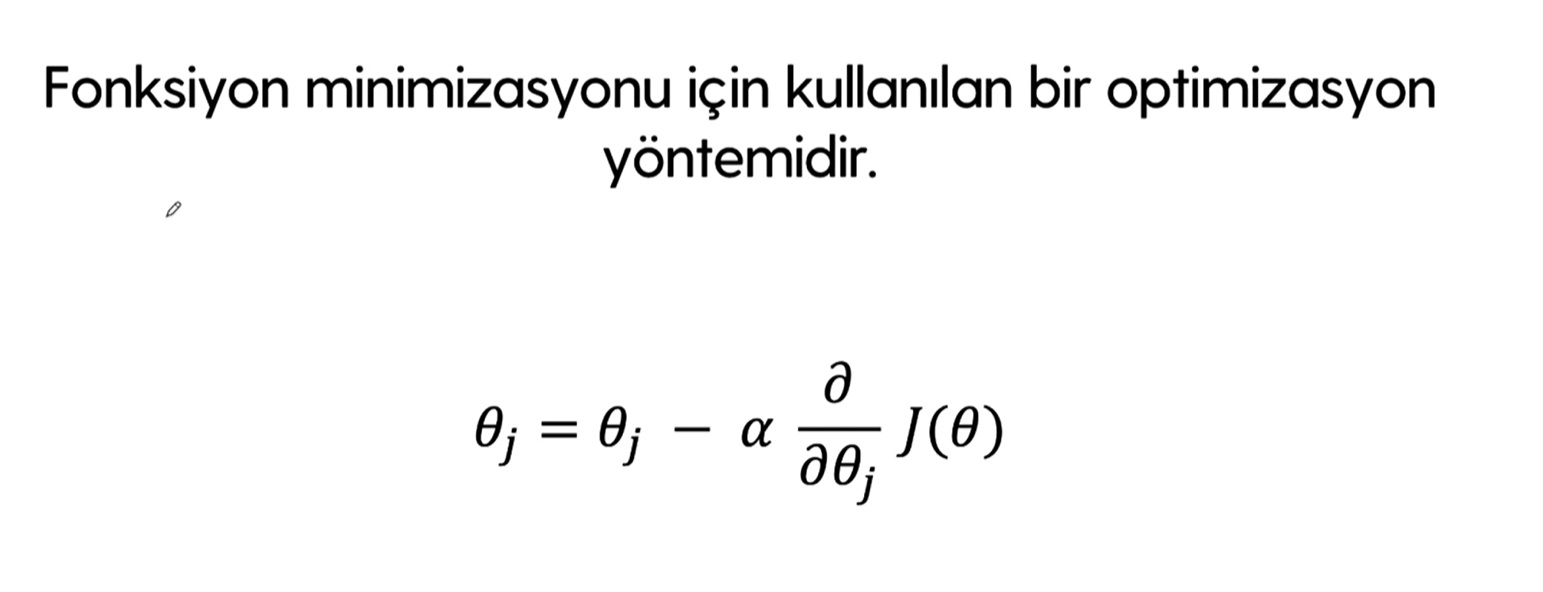

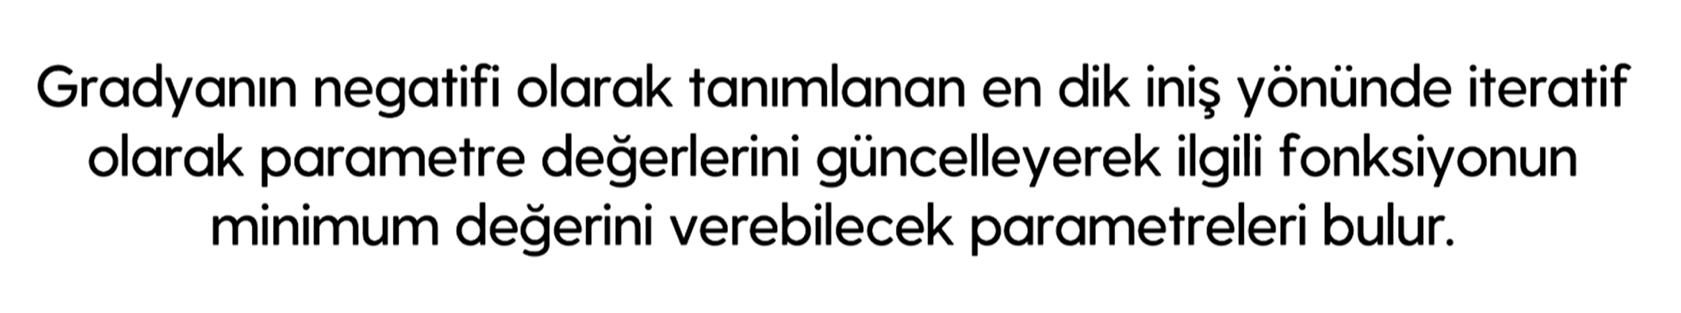

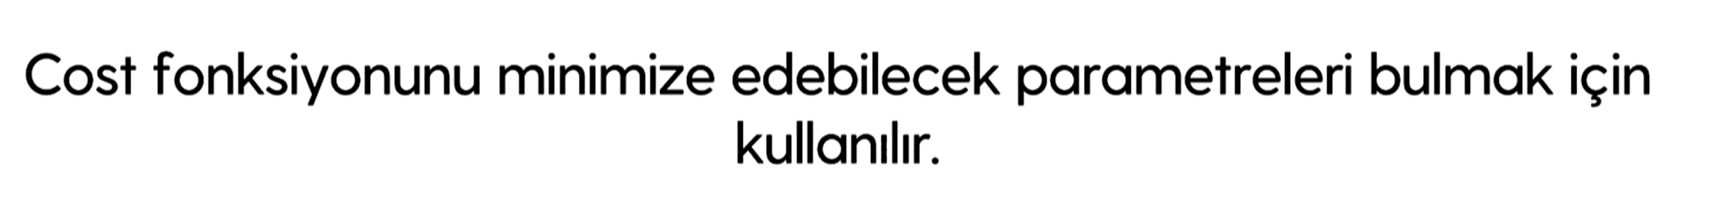

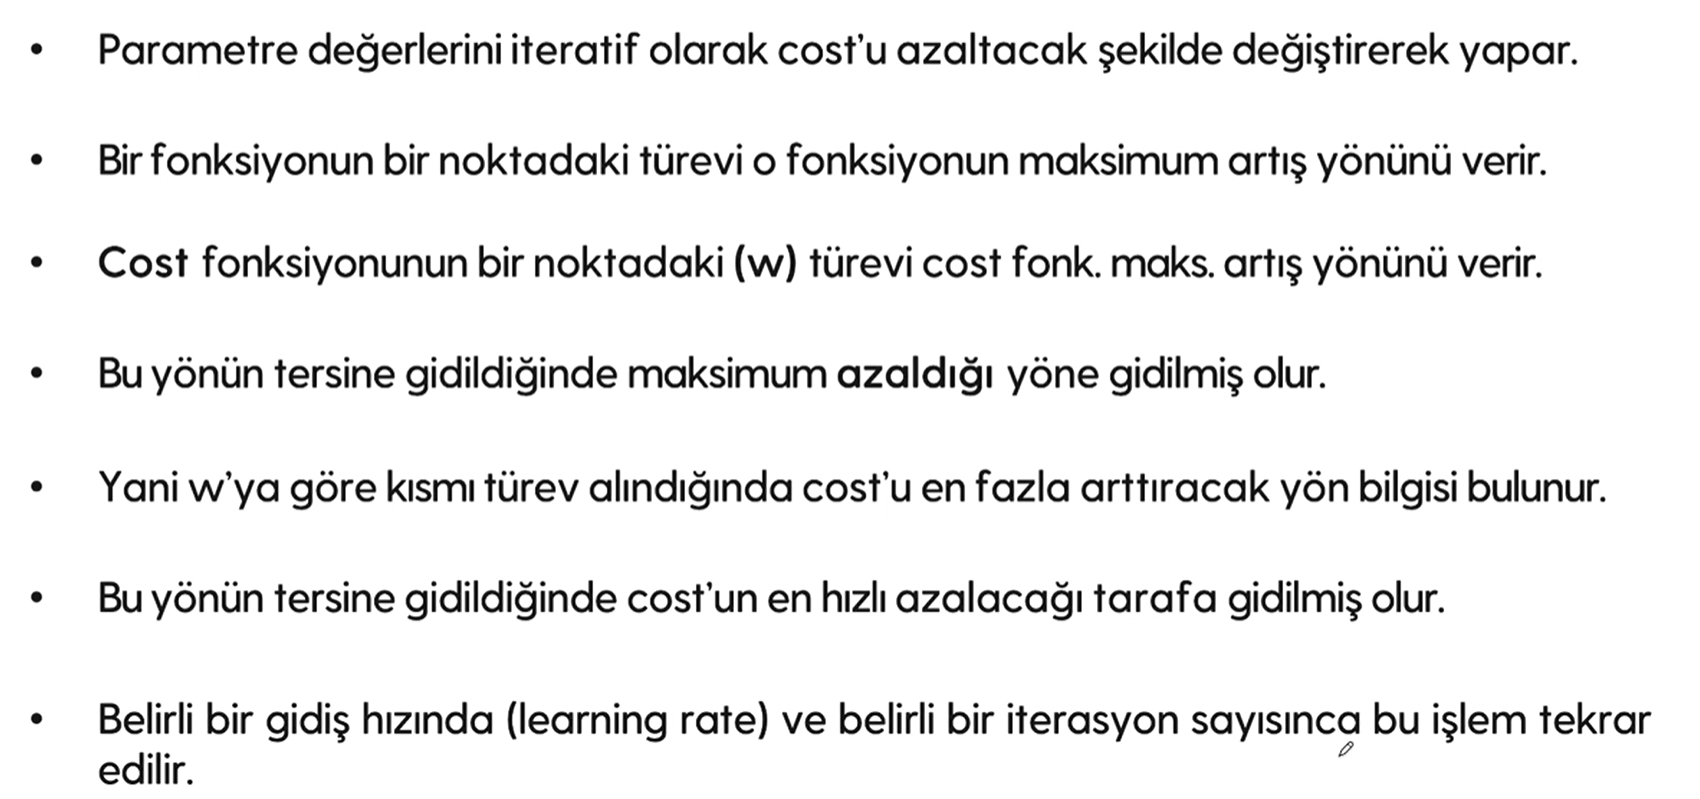

### Aktivasyon Fonksiyonu 

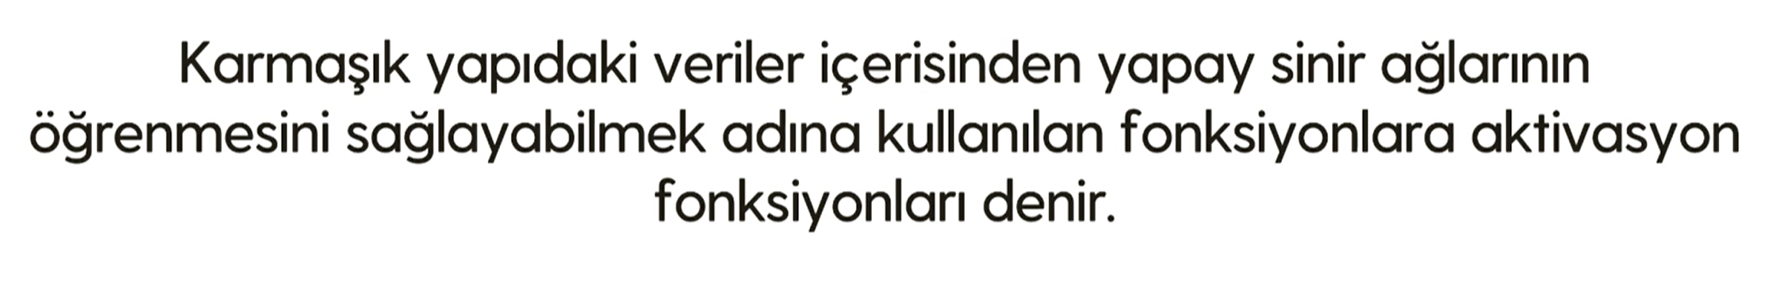

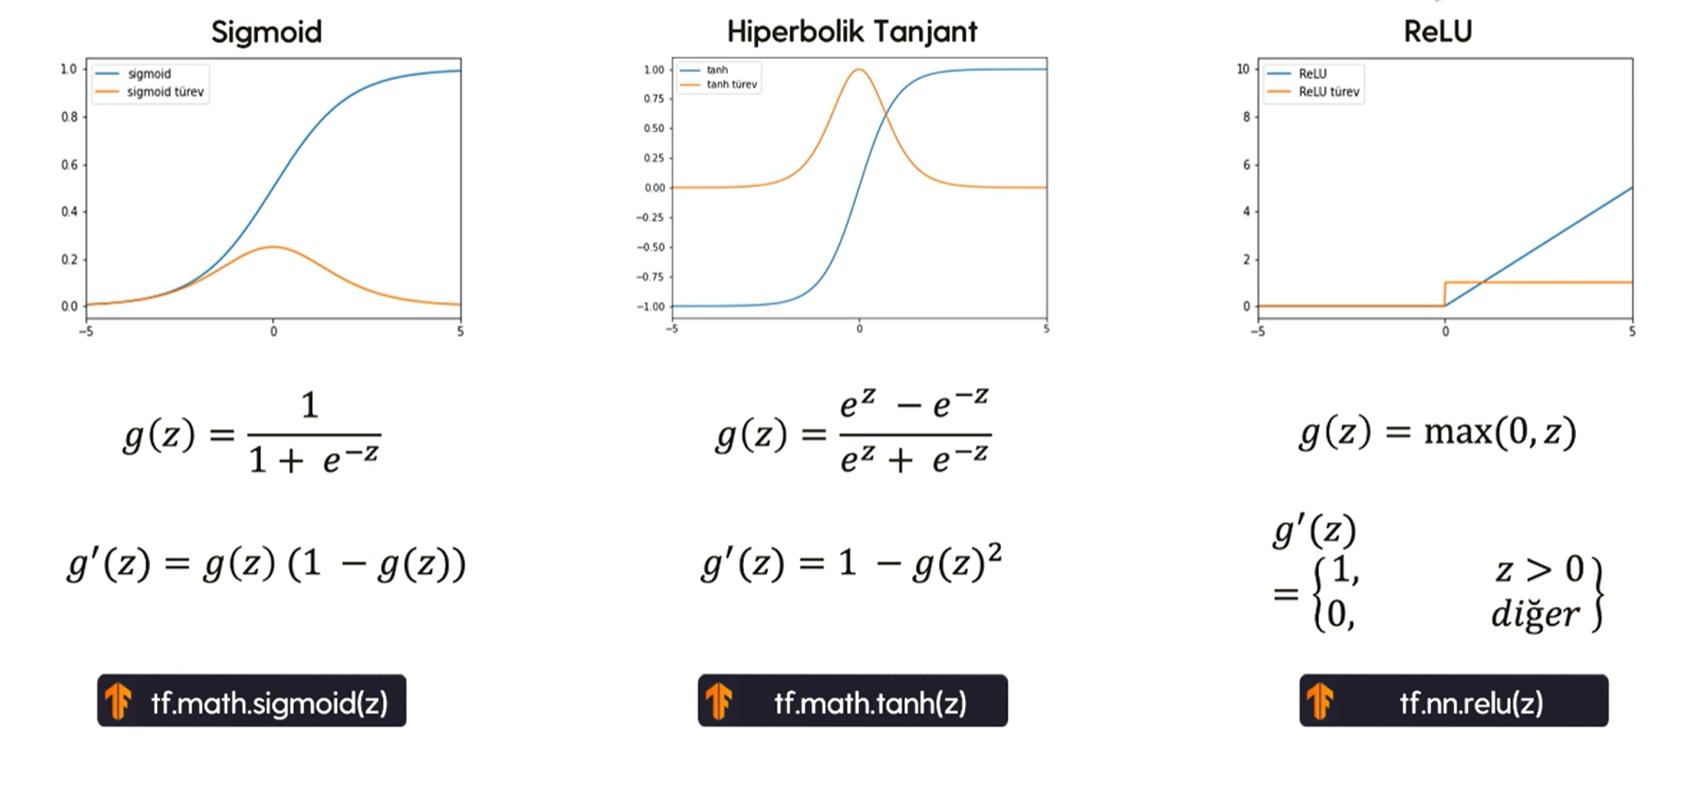

### Yapay Sinir Ağlarında Aşırı Öğrenme

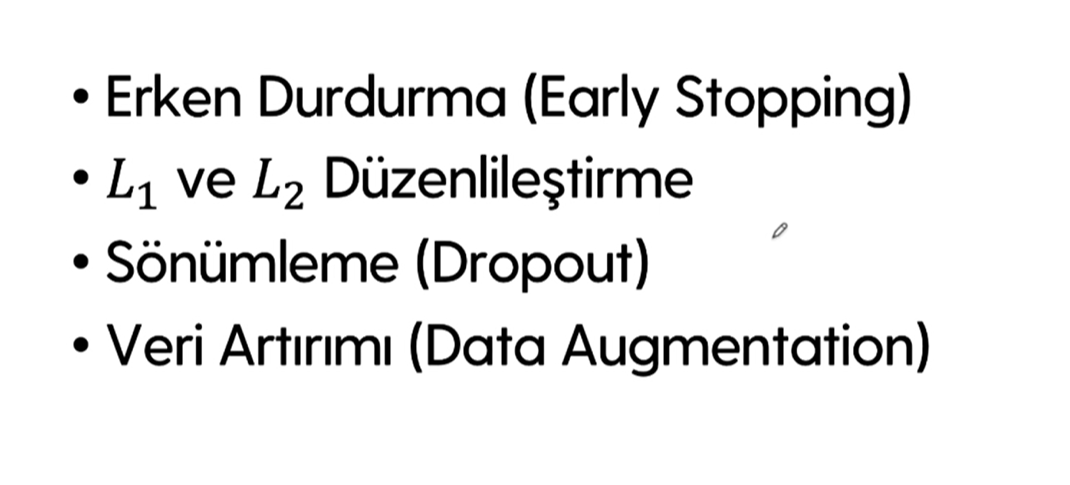

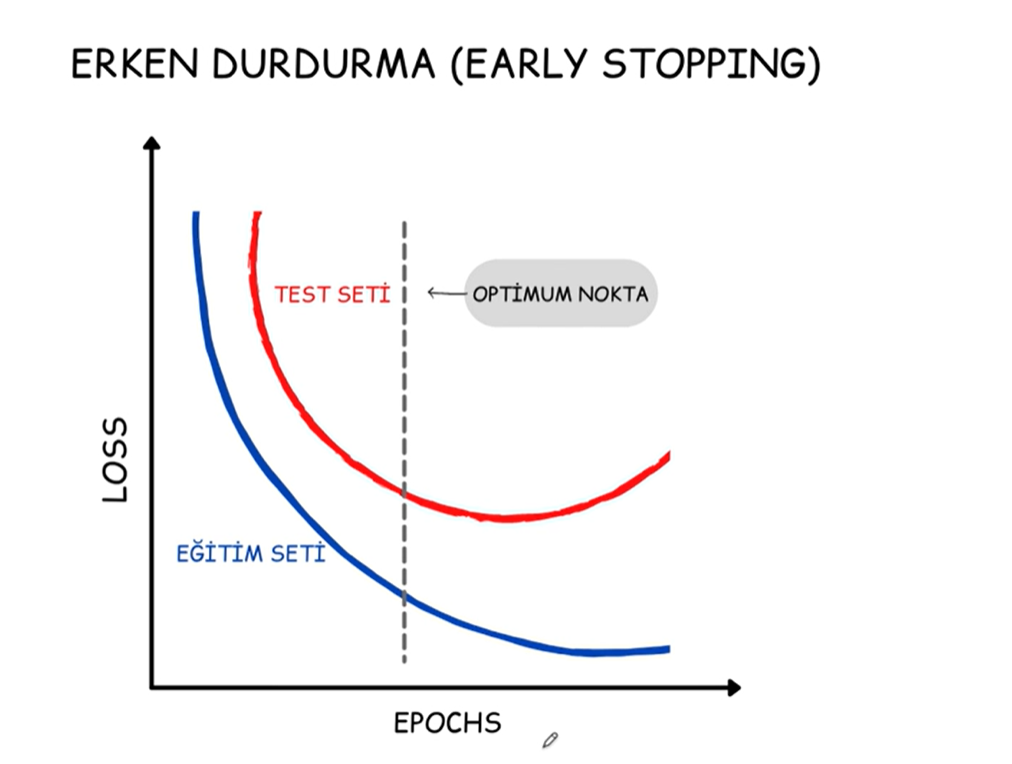

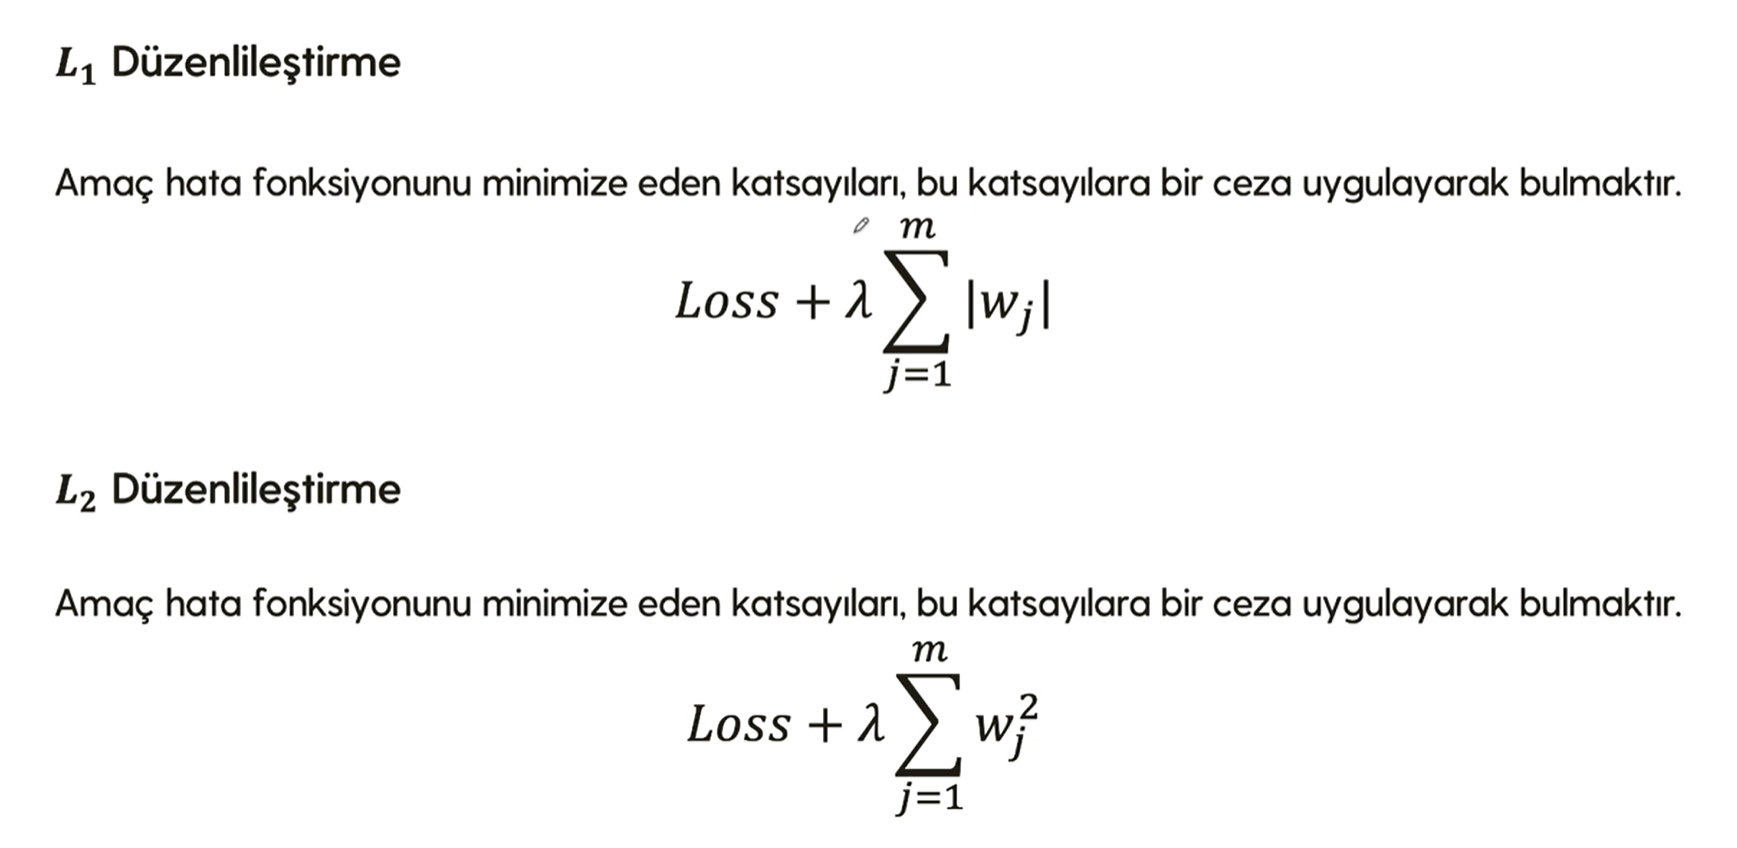

### Dropout(Sönümleme)
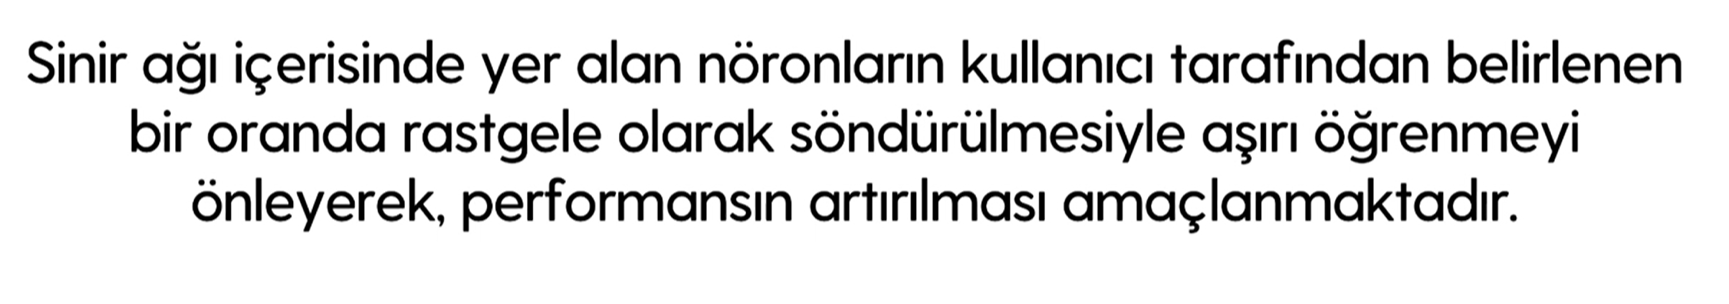

### Veri Artırımı
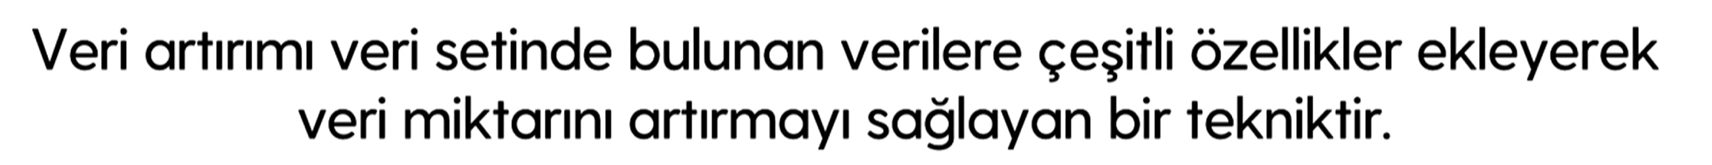

# **Yapay Sinir Ağı(ANN) Uygulama**

### Yapay Sinir Ağları(ANN) ile Rakam Tanıma 

1) İş Problemi (Business Problem)
2) Veriyi Anlamak (Data Understanding)
3) Veriyi Hazırlamak (Data Prepatation)
4) Modelleme (Modeling) 
5) Değerlendirme (Evolation)

# 1) İş Problemi (Business Problem)
### MNIST (Modified National Institute of Standart and Technology)
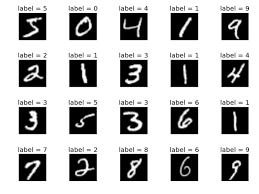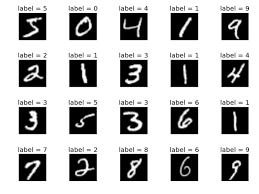

* Bu veri seti 28x28 pixselden olaşan bir görsel veri setidir. İçerisinde eğitmek için kullanılacak 60.000 adet gözlem vardır. Ve 10.000 adette yapay sinir ağını eğittikten sonra performansını test etmek için kullanıcağımız test seti vardır. Kısaca toplamda 70.000 adet görüntüden oluşan bir veri setidir.

# 2) Veriyi Anlamak (Data Understanding)

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
# Mnist verisinin yüklenmesi
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("Eğitim Setinin Boyutu:", x_train.shape, y_train.shape)

Eğitim Setinin Boyutu: (60000, 28, 28) (60000,)


In [6]:
print("Test Setinin Boyutu:", x_test.shape, y_test.shape)

Test Setinin Boyutu: (10000, 28, 28) (10000,)


* X_train'in temsil ettiği pixellerdir. y_train ise çıktıdır. Hedef değişkenimiz de y'dir.

In [7]:
num_labels = len(np.unique(y_train))  # Hedef değişkenin sınıf sayısı
num_labels

10

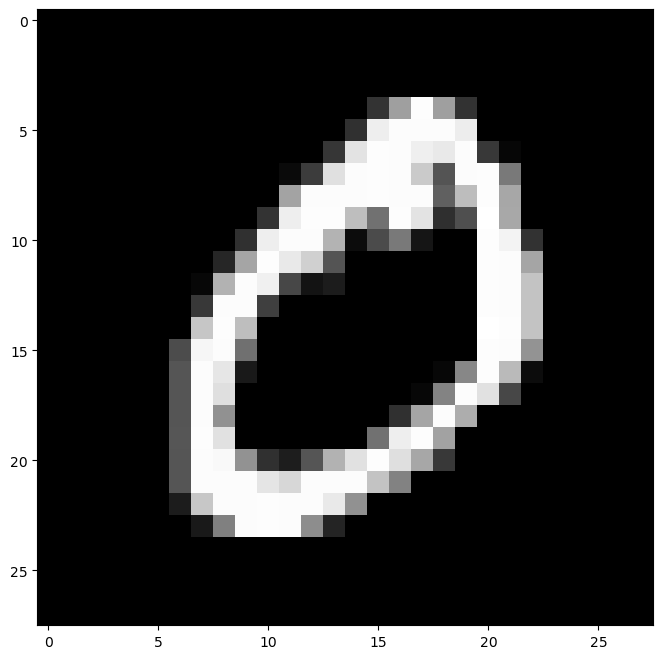

In [8]:
# Veri setinden örneklerin gösterilmesi
plt.figure(figsize = (10,8))
plt.imshow(x_train[1], cmap = "gray");

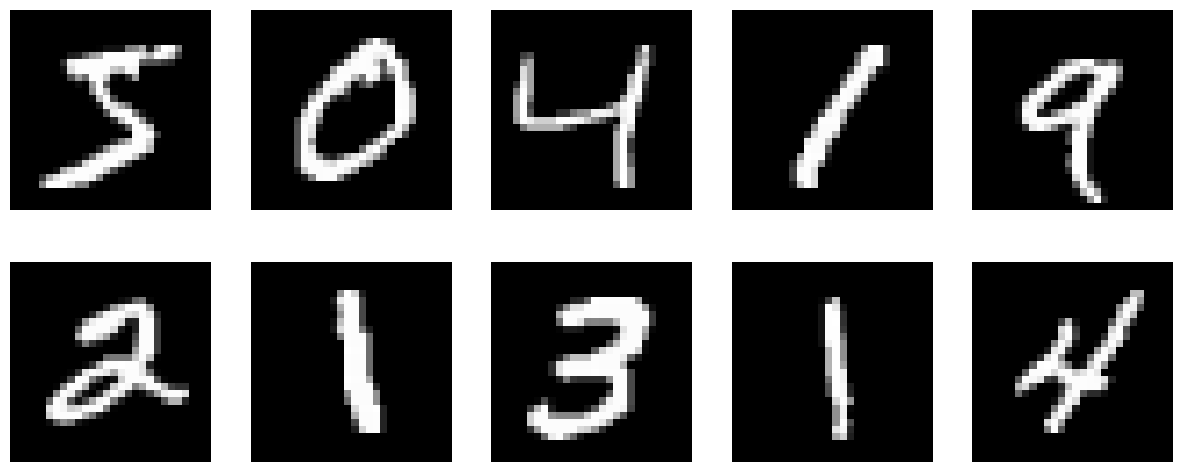

In [9]:
# Yukarıda sadece bir görüntüyü gördük şimdi ise bir döngü ile birden fazla görseli görelim:
plt.figure(figsize = (15,6))
for i in range(10):
    ax = plt.subplot(2, 5, i+1) # 2 satır 5 sütun olacak şekilde alt plotları ayarla
    plt.imshow(x_train[i], cmap = "gray")
    plt.axis("off")  # Eksen bilgisi istemediğimiz için off olarak ayarlıyoruz

In [10]:
# Yukarıda sadece belirli bir kısımı istedik bunun yerine aşağıda bir fonksiyon tanımlayalım

def visualize_img(data):
    plt.figure(figsize = (15,6))
    for i in range(10):
        ax = plt.subplot(2, 5, i+1)
        plt.imshow(x_train[i], cmap = "gray")
        plt.axis("off")

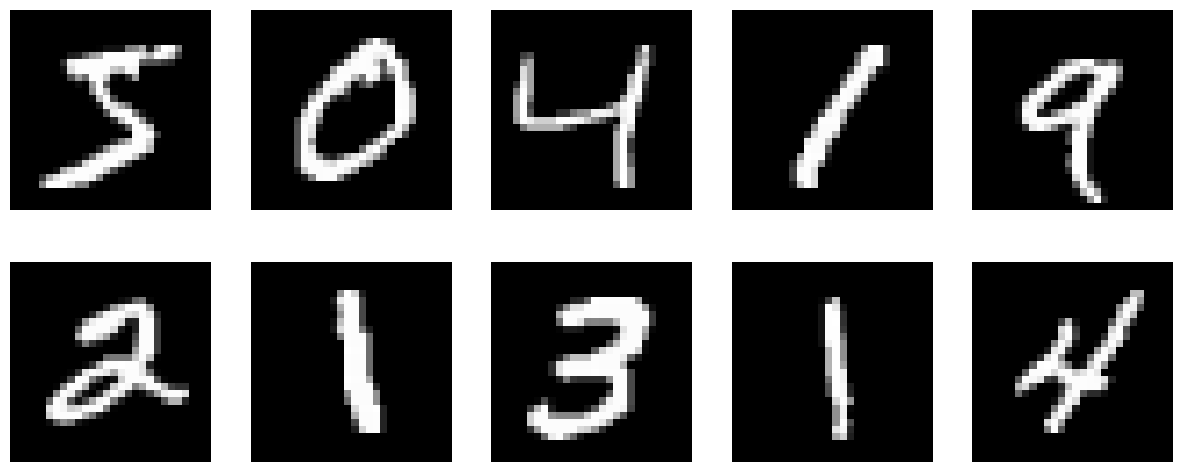

In [11]:
visualize_img(x_train)

In [12]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [13]:
x_train[2].shape

(28, 28)

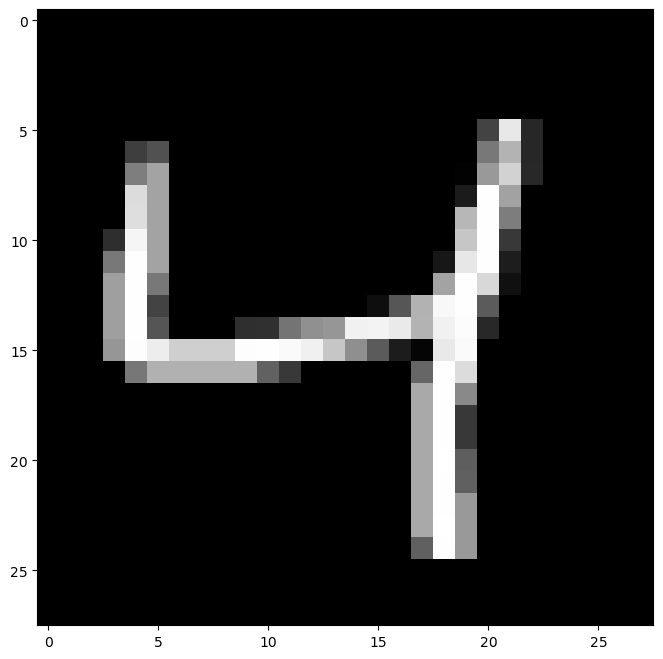

In [14]:
# Veri setinden örneklerin gösterilmesi
plt.figure(figsize = (10,8))
plt.imshow(x_train[2], cmap = "gray");

In [15]:
x_train[2][10, 10]  # 2. indexteki görselin 10'a 10'uncu yerindeki pixelin rengini bulma

0

In [16]:
x_train[2][14, 10]

49

In [17]:
x_train[2].mean()

24.799744897959183

In [18]:
x_train[2].sum()

19443

In [19]:
x_train[2][14:20, 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [20]:
x_train[2][14:20, 10:20].mean()

96.51666666666667

In [21]:
x_train[2][14:20, 10:20].sum()

5791

In [40]:
def pixel_visualize(img):
    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = "gray")
    width, height = img.shape

    threshold = img.max() / 2.5
    
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), 
                       xy = (y,x), 
                       color = "white" if img[x][y] < threshold else "black")

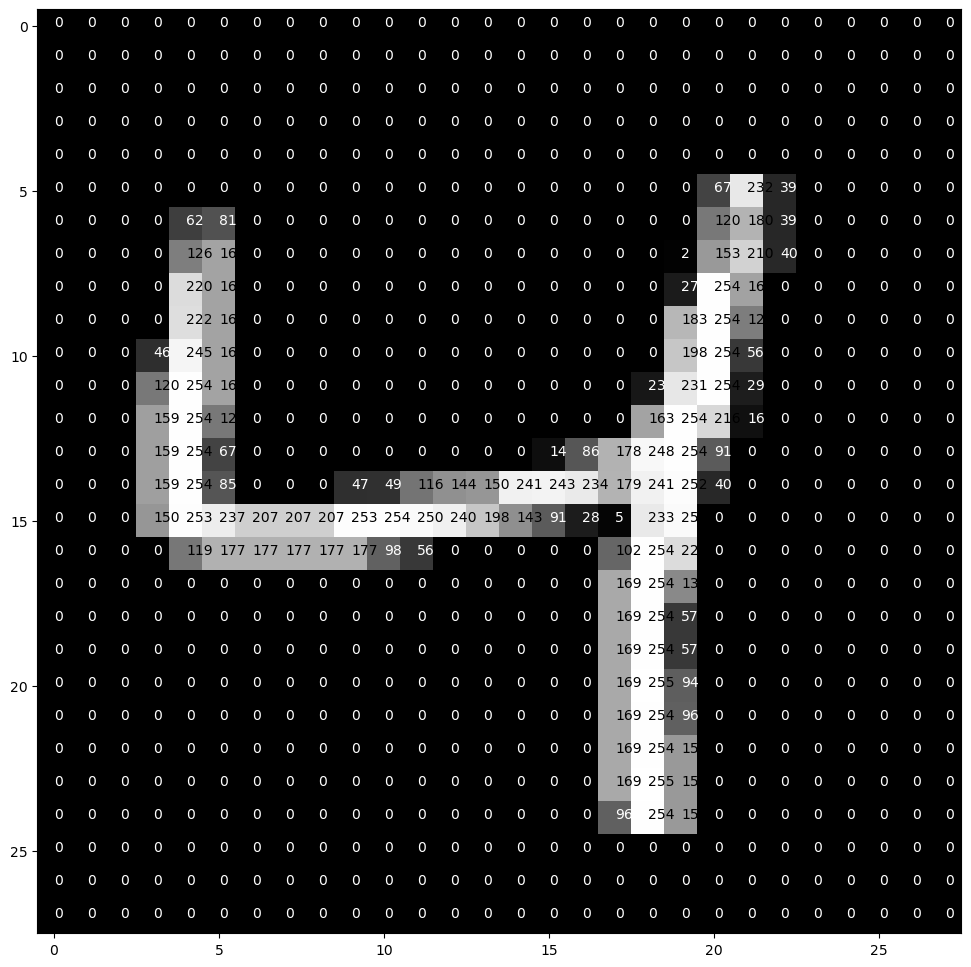

In [41]:
pixel_visualize(x_train[2])

# 3) Veriyi Hazırlama (Data Preparation)

### Encoding

* Önce: [0,1,2,3,4,5,6,7,8,9]
* Sonra: [0,0,1,0,0,0,0,0,0,0]
* Amaç: Hedef indeskin 1 olup diğerlerini 0(aynı) olacak şekilde ayarlamaktır.

In [42]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [43]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

* Yukarıdaki "to_categorical" yöntemi ile değerleri one-hot-encoding yöntemi ile dönüştürmüş olduk.

In [44]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Reshaping

In [46]:
image_size = x_train.shape[1]

In [47]:
image_size

28

In [48]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [49]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


### Normalization

* Elimizdeki pixelleri 0-1 arasına döndüştürme işlemi. Bunu yapmanın en kolay yolu ise her bir değeri 255'e bölmektir. 

In [50]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# 4) Modelleme (Modeling) 

### Sinir Ağı Mimarisini Tanımlamak

In [51]:
model = tf.keras.Sequential([
    Flatten(input_shape = (28, 28, 1)),
    Dense(units = 128, activation = "relu", name = "layer1"),
    Dense(units = num_labels, activation = "softmax", name = "output_layer")])

* Yukarıda çıkış katmanında aktivasyon fonksiyonunun "softmax" olarak kullanılma nedeni ikiden fazla sınıfa sahip olmasından dolayıdır. Yani elimizdeki prorje çok sınıflı bir sınıflandırma problemi olduğundan dolayı "softmax" aktivasyon fonksiyonu kullanılmaktadır. Eğer iki sınıflı bir sınıflandırma problemi olmuş olsaydı "sigmoid" fonksiyonu çıkış katmanı için kullanılırdı. Ayrıca son katmandaki "unit" kısmında elimizdeki sınıfların adedince birim tanımlanmıştır.

In [52]:
model.compile(loss = "categorical_crossentropy", 
             optimizer = "adam", 
             metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

* "loss" hata değerlendirme metriğidir. Amaç fonksiyonu minimize etmektir.
* "optimizer" loss fonksiyonunu minimize edecek optimizasyon yöntemi algoritmasıdır.

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.fit(x_train, y_train,
          epochs = 10,  # Optimizsayon tur sayısı süreci
          batch_size = 128,  # Her iterasyonda 128 adet gözlem birimine odaklanarak epochları denicek. 
          validation_data = (x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9838 - loss: 0.0579 - precision: 0.9869 - recall: 0.9809 - val_accuracy: 0.9739 - val_loss: 0.0823 - val_precision: 0.9775 - val_recall: 0.9704
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9863 - loss: 0.0482 - precision: 0.9893 - recall: 0.9837 - val_accuracy: 0.9757 - val_loss: 0.0758 - val_precision: 0.9793 - val_recall: 0.9732
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9888 - loss: 0.0407 - precision: 0.9903 - recall: 0.9867 - val_accuracy: 0.9754 - val_loss: 0.0773 - val_precision: 0.9777 - val_recall: 0.9732
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0332 - precision: 0.9928 - recall: 0.9895 - val_accuracy: 0.9752 - val_loss: 0.0780 - val_precision: 0.9777 - val_recall: 0.9726
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9927 - loss: 0.0281 - precision: 0.9941 - recall: 0.9911 - val_accuracy: 0.9777 - val_loss: 0.

# 5) Model Başarısını Değerlendirme (Evolation)

In [56]:
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128, 
                    validation_data = (x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9977 - loss: 0.0116 - precision: 0.9979 - recall: 0.9972 - val_accuracy: 0.9763 - val_loss: 0.0796 - val_precision: 0.9785 - val_recall: 0.9757
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9981 - loss: 0.0096 - precision: 0.9983 - recall: 0.9978 - val_accuracy: 0.9791 - val_loss: 0.0743 - val_precision: 0.9805 - val_recall: 0.9780
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9989 - loss: 0.0073 - precision: 0.9989 - recall: 0.9987 - val_accuracy: 0.9777 - val_loss: 0.0792 - val_precision: 0.9788 - val_recall: 0.9773
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9988 - loss: 0.0066 - precision: 0.9990 - recall: 0.9987 - val_accuracy: 0.9788 - val_loss: 0.0818 - val_precision: 0.9802 - val_recall: 0.9778
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0055 - precision: 0.9993 - recall: 0.9991 - val_accuracy: 0.9783 - val_loss: 0.

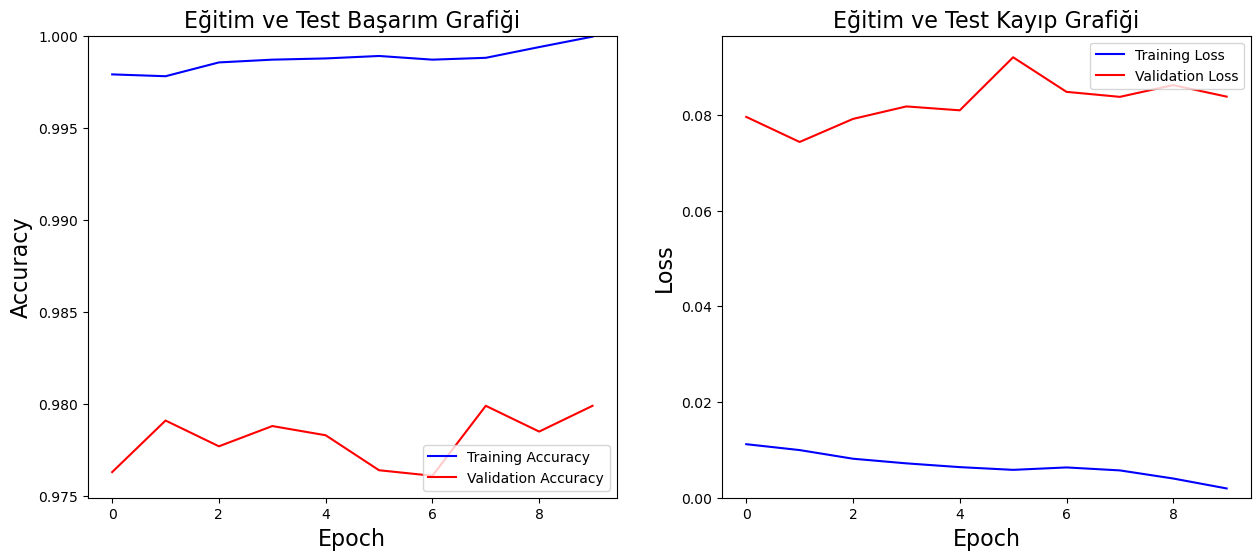

In [59]:
# Accuracy ve Loss Grafikleri

# Accuracy Grafiği
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], color = "blue", label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], color = "red", label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.xlabel("Epoch", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.ylim([min(plt.ylim()), 1])
plt.title("Eğitim ve Test Başarım Grafiği", fontsize = 16)

# Loss Grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], color = "blue", label = "Training Loss")
plt.plot(history.history["val_loss"], color = "red", label = "Validation Loss")
plt.legend(loc = "upper right")
plt.xlabel("Epoch", fontsize = 16)
plt.ylabel("Loss", fontsize = 16)
plt.ylim([0, max(plt.ylim())])
plt.title("Eğitim ve Test Kayıp Grafiği", fontsize = 16)
plt.show()

In [63]:
loss, precision, recall, acc = model.evaluate(x_test, y_test)
print("Test Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Percision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9772 - loss: 0.0977 - precision: 0.9780 - recall: 0.9765
Test Accuracy: 98.0%

Test Loss: 8.4%

Test Percision: 98.1%

Test Recall: 97.9%


* "Precision ve Recall" değerlerine bakma nedenimiz Accuracy ile birbirlerin yakın çıktığında bir hata olmadığına işarettir. Ayrıca "Precision" model ile örneğin bir olarak tahmin ettiğimiz sınıfların ne kadarının gerçekten bir olduğunu ifade eder. Yani precision tahmin ettiklerimizin başarısıdır. "Recall" ise sınıfların gerçek değerlerinin kaç tanesini doğru tahmin edildiğini ifade eder.  

# Modelin Kaydedilmesi ve Tahmin İçin Kullanılması

In [64]:
model.save("mnist_model.h5")

In [65]:
import random

random = random.randint(0, x_test.shape[0])

In [66]:
random

2046

In [68]:
test_image = x_test[random]
test_image

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [69]:
y_test[random]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

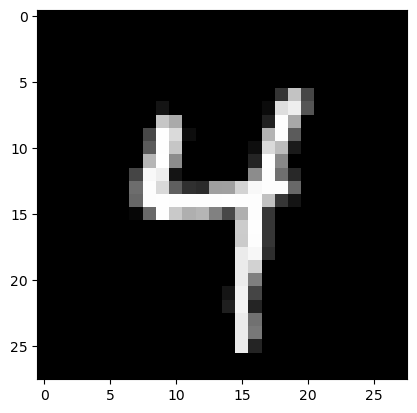

In [71]:
plt.imshow(test_image.reshape(28,28), cmap = "gray");

In [72]:
test_data = x_test[random].reshape(1,28,28,1)

In [73]:
probability = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [74]:
probability

array([[1.7800698e-15, 8.4251404e-11, 8.8248399e-15, 2.6034981e-15,
        1.0000000e+00, 6.1380148e-14, 1.9829480e-13, 2.2225576e-11,
        1.9562899e-10, 2.8498430e-08]], dtype=float32)

In [75]:
predicted_classes = np.argmax(probability)
predicted_classes

4

In [77]:
print(f"Tahmin Edilen Sınıf: {predicted_classes} \n")
print(f"Tahmin Edilen Sınıfın Olasılık Değer: {(np.max(probability, axis = -1))[0]} \n")
print(f"Diğer Sınıfların Olasılık Değerleri: {probability}")

Tahmin Edilen Sınıf: 4 

Tahmin Edilen Sınıfın Olasılık Değer: 1.0 

Diğer Sınıfların Olasılık Değerleri: [[1.7800698e-15 8.4251404e-11 8.8248399e-15 2.6034981e-15 1.0000000e+00
  6.1380148e-14 1.9829480e-13 2.2225576e-11 1.9562899e-10 2.8498430e-08]]


# DONE